# Identifizierung gefährlicher Gebiete

Damit einem Fahrradfahrer je nach seiner Startstation oder Fahrtgebiet eine preislich angepasste Versicherung angeboten werden kann, muss die Gefahr an verschiedenen Orten eingeschätzt werden. 

Zunächst wird untersucht, in welchen Bereichen viele Unfälle mit Fahrrädern passieren (**absolut**).

Es ist logisch, dass **absolut mehr Unfälle in höher frequentierten Bereichen** passieren. Um diesen Effekt zu berücksichtigen, wird der **Stationstraffic** in diesem Fall als Proxy für das Fahrradfahreraufkommen in einem Bereich verwendet bzw. angenommen. 

Zur Vereinfachung wird die Tageszeit zunächst nicht berücksichtigt, wäre in der Praxis jedoch auch relevant.



Zunächst Laden und Betrachten der Crash Daten:

In [1]:
from datasets.bike_crash_dataset import BikeCrashDataset

crash_dataset = BikeCrashDataset("data/bike_crashes.csv")

In [2]:
from modeling.density_estimator import DensityEstimator

crash_density_estimator = DensityEstimator(data=crash_dataset.df[["x", "y"]].values, bandwidth=1)

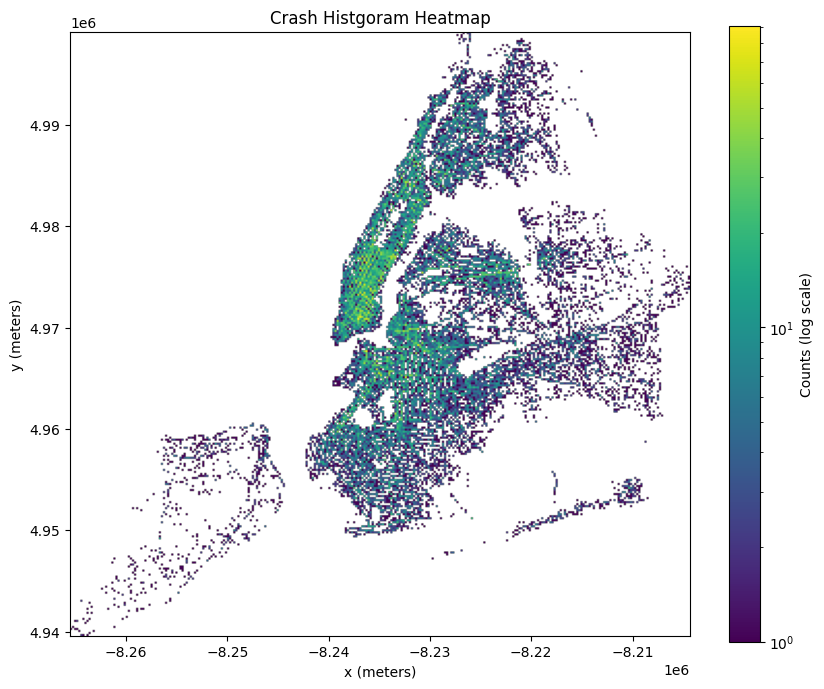

In [3]:
crash_density_estimator.plot_histogram_heatmap(bins=300, title="Crash Histgoram Heatmap")

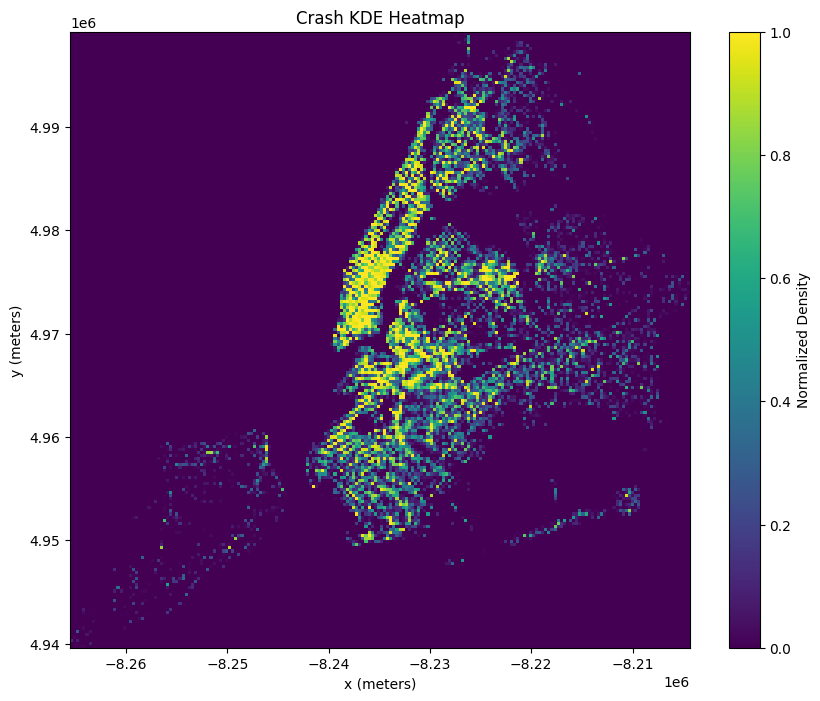

In [5]:
crash_density_estimator = DensityEstimator(data=crash_dataset.df[["x", "y"]].values, bandwidth=50)
crash_density_estimator.plot_kde_heatmap(grid_size=200, title="Crash KDE Heatmap")

Laden und Betrachten der Ride Daten

In [6]:
from datasets.citibike_dataset import CitibikeDataset
citibike_dataset = CitibikeDataset("data/2023-citibike-tripdata/202312-citibike-tripdata/202312-citibike-tripdata_1.csv")

c:\Users\JanSchmitz\code\axa_challenge\datasets\citibike_dataset.py:37: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [7]:
import numpy as np

station_traffic = (citibike_dataset.stations['start_count'] + citibike_dataset.stations['end_count']).values

traffic_locs = np.repeat(citibike_dataset.stations[['x_centered', 'y_centered']], station_traffic, axis=0)

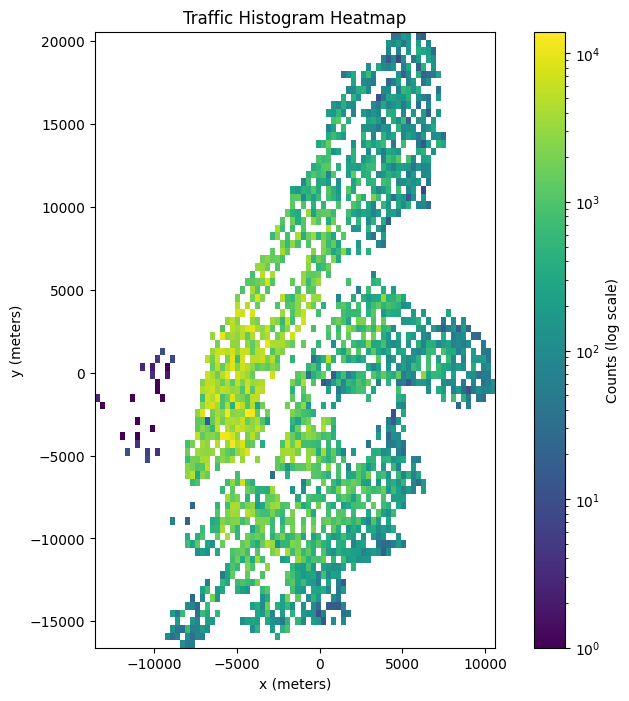

In [8]:
traffic_density_estimator = DensityEstimator(data=traffic_locs, bandwidth=5)
traffic_density_estimator.plot_histogram_heatmap(bins=80, title="Traffic Histogram Heatmap")

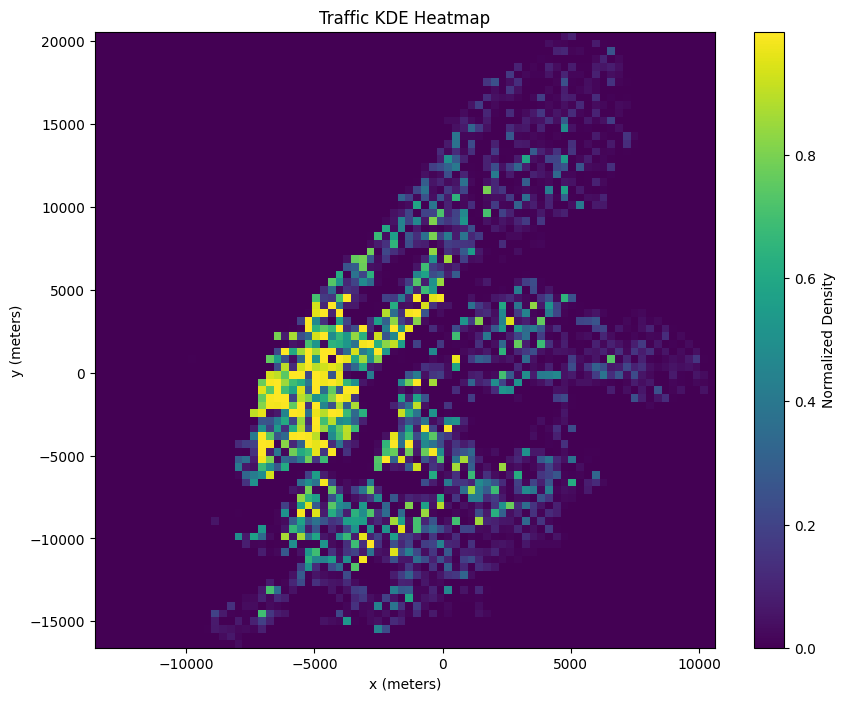

In [9]:
traffic_density_estimator = DensityEstimator(data=traffic_locs, bandwidth=80)
traffic_density_estimator.plot_kde_heatmap(grid_size=80, title="Traffic KDE Heatmap")

Alleine schon auf vergleichsweise wenig Traffic Daten, dauert die Kernel Density Estimation sehr lange, wohingegen die Histogram Heatmap schnell bestimmt werden kann. Vor allem aufgrund der begrenzten Challenge Zeit sollte die Verwendung der Heatmaps erstmal ausreichen.

### Verknüpfung der Crash und Traffic Daten

Es interessiert nur der Bereich der Citibike Daten. 

Die Crash Daten werden auf diesen Bereich beschränkt und die Koordinaten werden einheitlich zentriert.

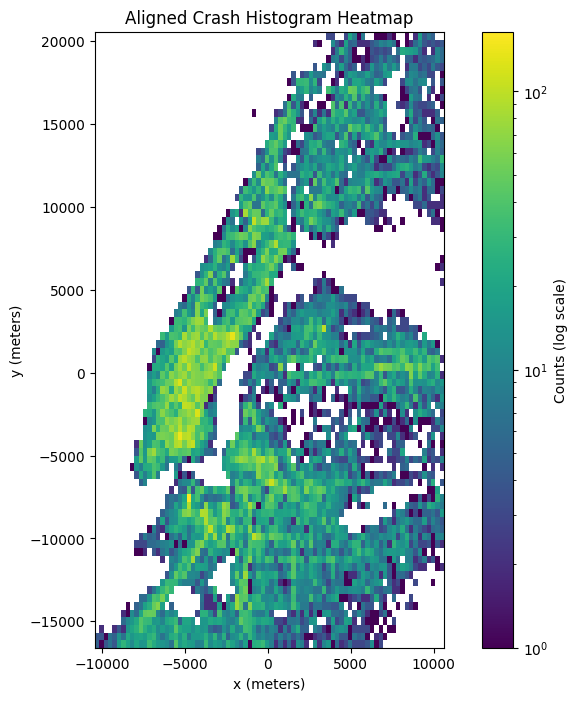

In [10]:
crash_dataset.citibike_alignment(citibike_dataset)
crash_density_estimator = DensityEstimator(data=crash_dataset.df[["x_centered", "y_centered"]].values, bandwidth=1)
crash_density_estimator.plot_histogram_heatmap(bins=80, title="Aligned Crash Histogram Heatmap")

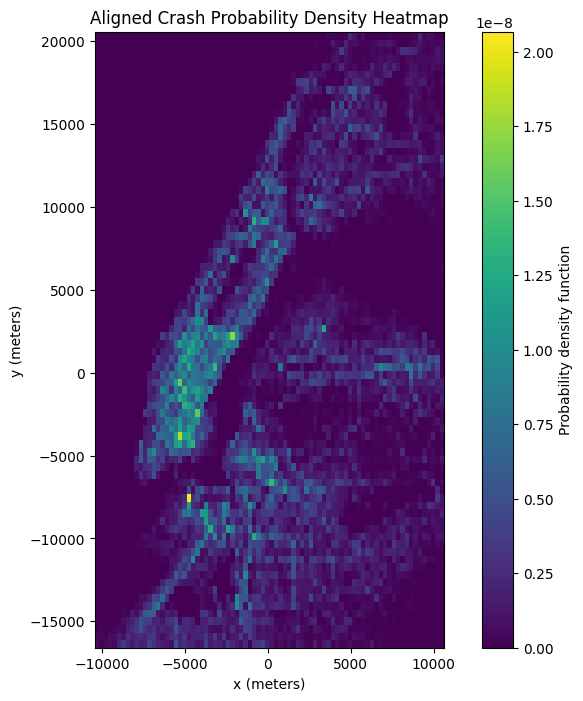

In [12]:
crash_density_estimator.plot_histogram_heatmap(bins=80, density=True, title="Aligned Crash Probability Density Heatmap")

Die geschätzte Wahrscheinlichkeitsdichte scheint besser nutzbar zu sein. **Im Plot sind einige helle Punkte zu sehen, die sich von ihrer Umgebung absetzen. Diese Bereiche könnten im Kontext der Stadtplanung genauer betrachtet werden.** Auch wenn der Traffic noch nicht berücksichtigt wurde, sind diese Bereiche relevant, da eine Veränderung hier einen größeren Einfluss auf die Fahrradfahrersicherheit hat.

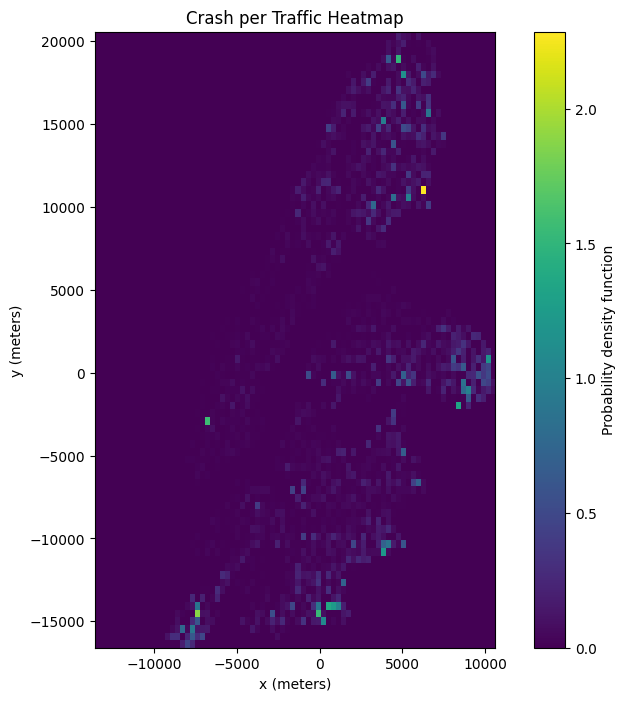

In [ ]:
DensityEstimator.normalized_histogram2d(crash_density_estimator, traffic_density_estimator, bins=80, title="Crash per Traffic Heatmap")

In den helleren Bereichen geschehen mehr Unfälle pro Fahrradverkehr. Hier sollten höhere Versicherungsbeiträge verlangt oder die Stadtplanung beeinflusst werden. 

In der Theorie sollte das stimmen, jedoch **wird in der Praxis wahrscheinlich der Citibike Stationstraffic in abgelegeneren Bereichen vermutlich eine schlechtere Approximation für den Fahrradverkehr sein**.

## Anwendungsmöglichkeiten

**Versicherungsunabhängig**
- In gefährlichen Bereichen kann die Stadtplanung beeinflusst werden, um Maßnahmen zur Sicherheit der Citibike Kunden durchzuführen
- Wenn den Kunden Routen vorgeschlagen werden, können gefährliche Stellen umfahren werden
- An gefährlichen Stellen kann der Kunde gewarnt werden

**Kooperation mit Versicherung**

Befindet bzw. bewegt sich ein Kunde in einem gefährlichen Gebiet, wird ihm eine teurere Versicherung angeboten oder er kann mehr darauf hingewiesen werden, dass sich eine Versicherung lohnt. Bei sicheren Gebieten kann der Preis günstiger sein.